In [56]:
import os
import sys
import pandas as pd
import dtale

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = r'data\sentiment_data_output_3rdjun.parquet'
# Reading the data for validation
data = pd.read_parquet(file_path, columns=['id', 'subject', 'date_ist', 'time_ist', 'projectid', 'nltk_label', 'sentiment_nltk_score'])
print(data.shape)

(10362, 7)


In [91]:
# d = dtale.show(df)
# d.open_browser()

In [4]:
data.head(2)

,id,subject,date_ist,time_ist,projectid,nltk_label,sentiment_nltk_score
0,6d30273a-6d16-4c9a-b207-31261df388ba,RE: 23-044 Drafting,2024-05-16,05:13:05,76461,POSITIVE,0.5574
1,6b7a51f9-201f-43fa-adc2-f23203ee00d5,RE: 23-043 Drafting,2024-05-18,03:34:35,76461,NEUTRAL,0.0000


In [7]:
data['projectid'].value_counts()

projectid
64591    960
63901    233
78785    136
77043    126
77552    120
        ... 
79093      1
79192      1
78602      1
79391      1
64032      1
Name: count, Length: 717, dtype: int64

In [52]:
# # Filter the DataFrame for the specific project ID
# filtered_data = data[data['projectid'] == 64591]

# Filter the DataFrame for the specific project IDs
filtered_data = data[data['projectid'].isin([64591, 63901, 78785, 77043, 77552])]

In [55]:
filtered_data[['nltk_label', 'projectid']].value_counts()

nltk_label  projectid
POSITIVE    64591        890
            63901        216
            77043        125
            78785        122
            77552         72
NEUTRAL     77552         45
            64591         41
NEGATIVE    64591         29
NEUTRAL     63901         10
            78785          8
NEGATIVE    63901          7
            78785          6
            77552          3
NEUTRAL     77043          1
Name: count, dtype: int64

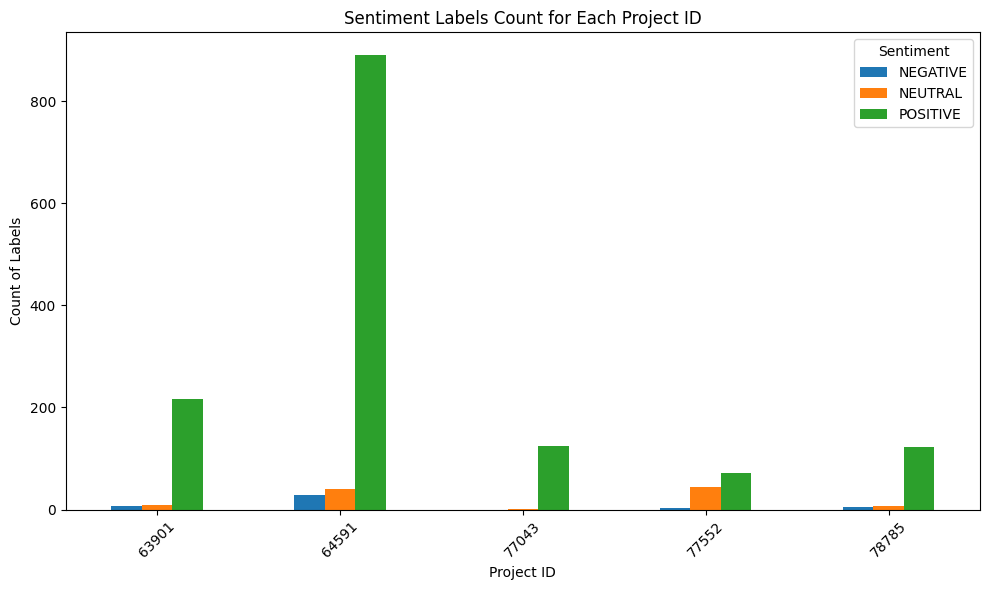

In [58]:
# Count the labels for each project ID
label_counts = filtered_data[['nltk_label', 'projectid']].value_counts().reset_index(name='count')

# Pivot the table to get a better structure for plotting
label_counts_pivot = label_counts.pivot(index='projectid', columns='nltk_label', values='count').fillna(0)

# Plot the data
label_counts_pivot.plot(kind='bar', stacked=False, figsize=(10, 6))

# Set the plot labels and title
plt.xlabel('Project ID')
plt.ylabel('Count of Labels')
plt.title('Sentiment Labels Count for Each Project ID')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [59]:
# filtered_data[filtered_data['nltk_label'] == 'NEGATIVE'][['nltk_label', 'sentiment_nltk_score']].sort_values(by='sentiment_nltk_score')

In [83]:
filtered_data.groupby(['projectid', 'nltk_label']).agg(
    {
        'sentiment_nltk_score': ['sum', 'mean', 'median', 'max', 'min'],
        'projectid': 'count'

    }
)

sentiment_nltk_score                                     \
                                      sum      mean   median     max     min   
projectid nltk_label                                                           
63901     NEGATIVE                -1.4050 -0.200714 -0.16850 -0.1406 -0.3098   
          NEUTRAL                  0.0258  0.002580  0.00000  0.0258  0.0000   
          POSITIVE               156.0884  0.722631  0.76500  0.9994  0.1531   
64591     NEGATIVE                -9.7294 -0.335497 -0.25000 -0.0874 -0.9929   
          NEUTRAL                 -0.0258 -0.000629  0.00000  0.0000 -0.0258   
          POSITIVE               736.2456  0.827242  0.90740  0.9996  0.0772   
77043     NEUTRAL                  0.0000  0.000000  0.00000  0.0000  0.0000   
          POSITIVE                99.7582  0.798066  0.84420  0.9811  0.0531   
77552     NEGATIVE                -0.4048 -0.134933 -0.05720 -0.0516 -0.2960   
          NEUTRAL                  0.0258  0.000573  0.00000  0.0258  0.0000   
          POSITIVE                30.0364  0.417172  0.31820  0.9072  0.0516   
78785     NEGATIVE                -2.7879 -0.464650 -0.45625 -0.0516 -0.8720   
          NEUTRAL                  0.0000  0.000000  0.00000  0.0000  0.0000   
          POSITIVE                82.4866  0.676120  0.69080  0.9779  0.2960   

                     projectid  
                         count  
projectid nltk_label            
63901     NEGATIVE           7  
          NEUTRAL           10  
          POSITIVE         216  
64591     NEGATIVE          29  
          NEUTRAL           41  
          POSITIVE         890  
77043     NEUTRAL            1  
          POSITIVE         125  
77552     NEGATIVE           3  
          NEUTRAL           45  
          POSITIVE          72  
78785     NEGATIVE           6  
          NEUTRAL            8  
          POSITIVE         122

In [88]:
filtered_data.groupby(['projectid', 'nltk_label']).describe()

sentiment_nltk_score                              \
                                    count      mean       std     min   
projectid nltk_label                                                    
63901     NEGATIVE                    7.0 -0.200714  0.070679 -0.3098   
          NEUTRAL                    10.0  0.002580  0.008159  0.0000   
          POSITIVE                  216.0  0.722631  0.232486  0.1531   
64591     NEGATIVE                   29.0 -0.335497  0.257376 -0.9929   
          NEUTRAL                    41.0 -0.000629  0.004029 -0.0258   
          POSITIVE                  890.0  0.827242  0.184699  0.0772   
77043     NEUTRAL                     1.0  0.000000       NaN  0.0000   
          POSITIVE                  125.0  0.798066  0.180112  0.0531   
77552     NEGATIVE                    3.0 -0.134933  0.139516 -0.2960   
          NEUTRAL                    45.0  0.000573  0.003846  0.0000   
          POSITIVE                   72.0  0.417172  0.183904  0.0516   
78785     NEGATIVE                    6.0 -0.464650  0.266007 -0.8720   
          NEUTRAL                     8.0  0.000000  0.000000  0.0000   
          POSITIVE                  122.0  0.676120  0.180264  0.2960   

                                                         
                           25%      50%     75%     max  
projectid nltk_label                                     
63901     NEGATIVE   -0.232250 -0.16850 -0.1608 -0.1406  
          NEUTRAL     0.000000  0.00000  0.0000  0.0258  
          POSITIVE    0.599400  0.76500  0.9152  0.9994  
64591     NEGATIVE   -0.421500 -0.25000 -0.1280 -0.0874  
          NEUTRAL     0.000000  0.00000  0.0000  0.0000  
          POSITIVE    0.735100  0.90740  0.9612  0.9996  
77043     NEUTRAL     0.000000  0.00000  0.0000  0.0000  
          POSITIVE    0.784500  0.84420  0.8834  0.9811  
77552     NEGATIVE   -0.176600 -0.05720 -0.0544 -0.0516  
          NEUTRAL     0.000000  0.00000  0.0000  0.0258  
          POSITIVE    0.318200  0.31820  0.5106  0.9072  
78785     NEGATIVE   -0.540075 -0.45625 -0.4019 -0.0516  
          NEUTRAL     0.000000  0.00000  0.0000  0.0000  
          POSITIVE    0.526700  0.69080  0.8372  0.9779

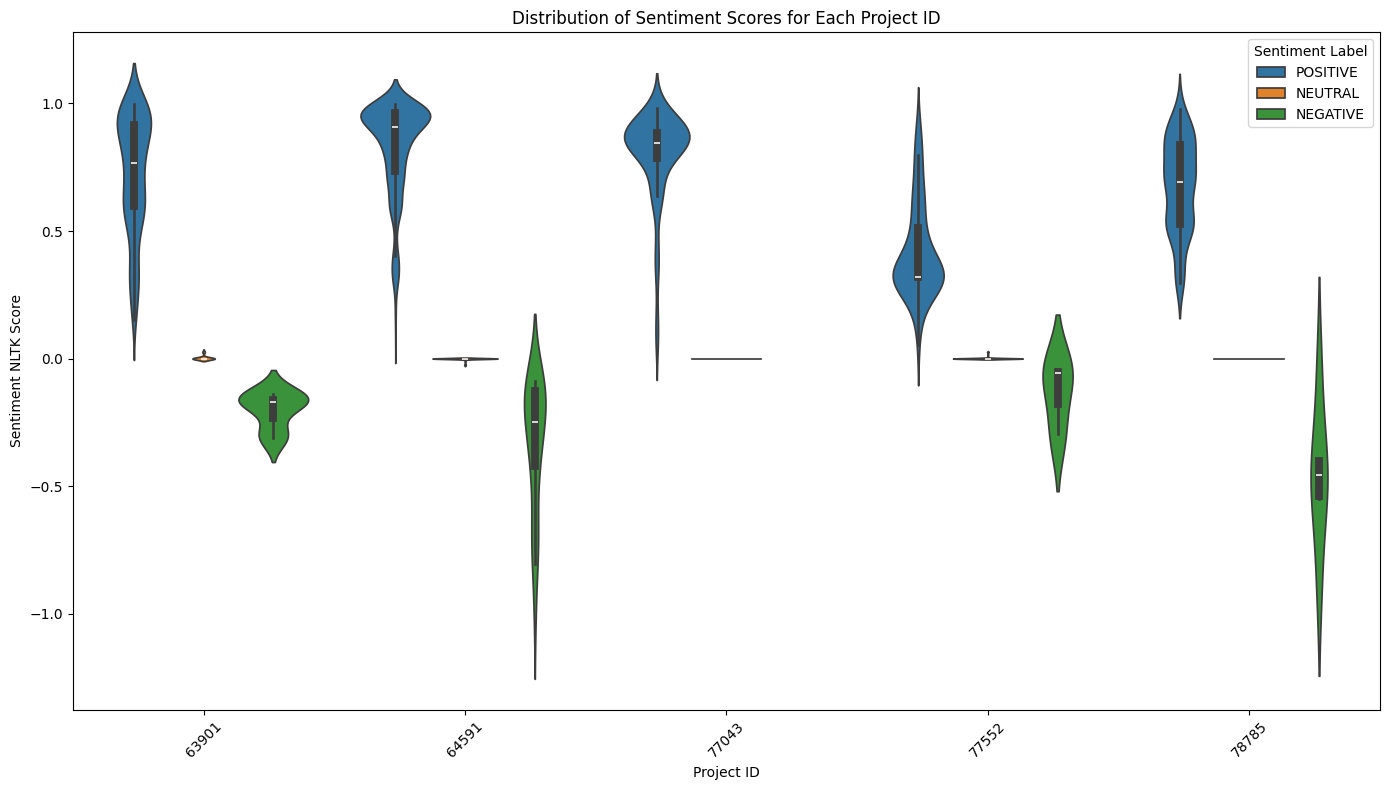

In [91]:
# Create the plot
plt.figure(figsize=(14, 8))

# Use seaborn boxplot to plot the distribution of sentiment scores
sns.violinplot(data=filtered_data, x='projectid', y='sentiment_nltk_score', hue='nltk_label')
# sns.histplot(data=filtered_data, x='projectid', y='sentiment_nltk_score', hue='nltk_label')

# Customizing the plot
plt.xlabel('Project ID')
plt.ylabel('Sentiment NLTK Score')
plt.title('Distribution of Sentiment Scores for Each Project ID')
plt.legend(title='Sentiment Label')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [94]:
# filtered_data.describe()
filtered_data.columns

Index(['id', 'subject', 'date_ist', 'time_ist', 'projectid', 'nltk_label',
       'sentiment_nltk_score'],
      dtype='object')

In [92]:
# filtered_data[filtered_data['nltk_label'] == 'NEGATIVE']['sentiment_nltk_score'].hist(bins=50)

In [98]:
# Step 3: Aggregate Sentiments at the Project Level
agg_data = filtered_data.groupby(['projectid', 'nltk_label']).agg(
    count=('nltk_label', 'count'),
    median_sentiment=('sentiment_nltk_score', 'median')
) .reset_index()

agg_data

,projectid,nltk_label,count,median_sentiment
0,63901,NEGATIVE,7,-0.16850
1,63901,NEUTRAL,10,0.00000
2,63901,POSITIVE,216,0.76500
3,64591,NEGATIVE,29,-0.25000
4,64591,NEUTRAL,41,0.00000
5,64591,POSITIVE,890,0.90740
6,77043,NEUTRAL,1,0.00000
7,77043,POSITIVE,125,0.84420
8,77552,NEGATIVE,3,-0.05720
9,77552,NEUTRAL,45,0.00000


In [115]:
# Step 4: Determine Project Labels
def tag_project_label(group):
    total_count = group['count'].sum()
    sentiment_counts = group.set_index('nltk_label')['count'].to_dict()
    sentiment_medians = group.set_index('nltk_label')['median_sentiment'].to_dict()
    
    negative_count = sentiment_counts.get('NEGATIVE', 0)
    neutral_count = sentiment_counts.get('NEUTRAL', 0)
    positive_count = sentiment_counts.get('POSITIVE', 0)
    
    negative_weight = negative_count / total_count if total_count > 0 else 0
    neutral_weight = neutral_count / total_count if total_count > 0 else 0
    positive_weight = positive_count / total_count if total_count > 0 else 0

    # Adjust the weights for higher impact of negative sentiments
    negative_weight_adjusted = negative_weight * 10  # Adjust this factor based on your preference
    
    total_weighted_sentiment = negative_weight_adjusted + neutral_weight + positive_weight
 
    
    if negative_count > 0 and negative_weight_adjusted / total_weighted_sentiment > 0.3:  # Adjust threshold as needed
        return pd.Series({
            'project_label': 'NEGATIVE',
            'emails_count' : total_count,
            'negative_count': negative_count,
            'neutral_count': neutral_count,
            'positive_count': positive_count,
            'negative_weight': negative_weight,
            'neutral_weight': neutral_weight,
            'positive_weight': positive_weight,
            'median_negative_sentiment': sentiment_medians.get('NEGATIVE', 0),
            'median_neutral_sentiment': sentiment_medians.get('NEUTRAL', 0),
            'median_positive_sentiment': sentiment_medians.get('POSITIVE', 0)
        })
    elif neutral_weight > positive_weight:
        return pd.Series({
            'project_label': 'NEUTRAL',
            'emails_count' : total_count,
            'negative_count': negative_count,
            'neutral_count': neutral_count,
            'positive_count': positive_count,
            'negative_weight': negative_weight,
            'neutral_weight': neutral_weight,
            'positive_weight': positive_weight,
            'median_negative_sentiment': sentiment_medians.get('NEGATIVE', 0),
            'median_neutral_sentiment': sentiment_medians.get('NEUTRAL', 0),
            'median_positive_sentiment': sentiment_medians.get('POSITIVE', 0)
        })
    else:
        return pd.Series({
            'project_label': 'POSITIVE',
            'emails_count' : total_count,
            'negative_count': negative_count,
            'neutral_count': neutral_count,
            'positive_count': positive_count,
            'negative_weight': negative_weight,
            'neutral_weight': neutral_weight,
            'positive_weight': positive_weight,
            'median_negative_sentiment': sentiment_medians.get('NEGATIVE', 0),
            'median_neutral_sentiment': sentiment_medians.get('NEUTRAL', 0),
            'median_positive_sentiment': sentiment_medians.get('POSITIVE', 0)
        })

In [116]:
# Step 5: Apply the Function
project_labels = agg_data.groupby('projectid').apply(tag_project_label).reset_index()

project_labels

C:\Users\pis05408.PINNACLE\AppData\Local\Temp\ipykernel_636\2116725204.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,projectid,project_label,emails_count,negative_count,neutral_count,positive_count,negative_weight,neutral_weight,positive_weight,median_negative_sentiment,median_neutral_sentiment,median_positive_sentiment
0,63901,POSITIVE,233,7,10,216,0.030043,0.042918,0.927039,-0.16850,0.0,0.7650
1,64591,POSITIVE,960,29,41,890,0.030208,0.042708,0.927083,-0.25000,0.0,0.9074
2,77043,POSITIVE,126,0,1,125,0.000000,0.007937,0.992063,0.00000,0.0,0.8442
3,77552,POSITIVE,120,3,45,72,0.025000,0.375000,0.600000,-0.05720,0.0,0.3182
4,78785,NEGATIVE,136,6,8,122,0.044118,0.058824,0.897059,-0.45625,0.0,0.6908


In [ ]:
# Step 6: Validation and Refinement
# Validate and refine the thresholds and rules based on expert feedback or historical data

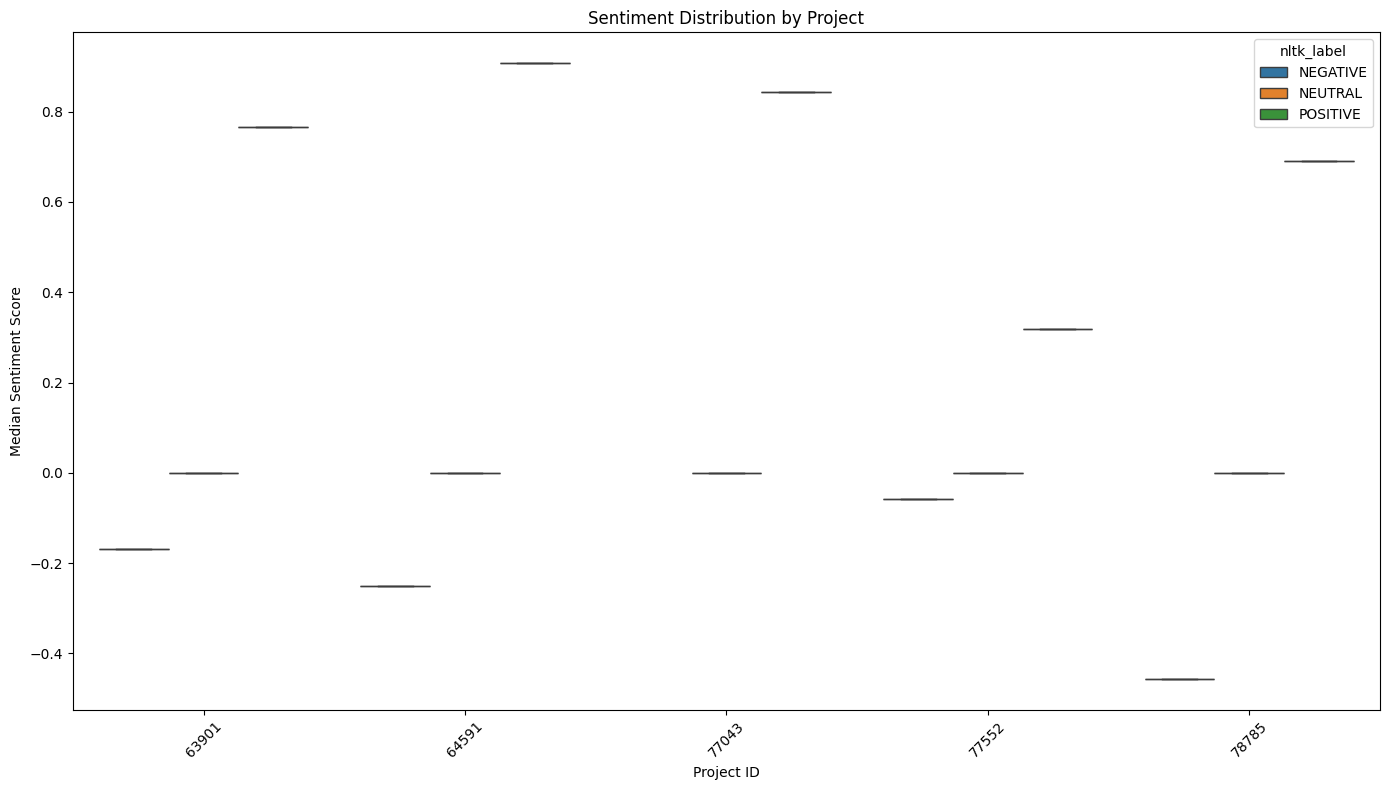

In [101]:
# Step 7: Visualization and Reporting
# Example visualization
plt.figure(figsize=(14, 8))
sns.boxplot(data=agg_data, x='projectid', y='median_sentiment', hue='nltk_label')
plt.xlabel('Project ID')
plt.ylabel('Median Sentiment Score')
plt.title('Sentiment Distribution by Project')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()